In [2]:
import os
import warnings
import tqdm
import pandas as pd
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [3]:
%load_ext autoreload
%autoreload 2
import socceraction.spadl as spadl
import socceraction.vaep.formula as vaepformula

In [4]:
X_test = pd.read_csv("./soccer_multiclass_data/X_test",index_col=0)
Y_test = pd.read_csv("./soccer_multiclass_data/Y_test",index_col=0)
multiclass_dcn_probability = pd.read_csv('./result/Dcn_model_final_result',index_col=0)

In [5]:
X_test

,type_id_a0,type_id_a1,type_id_a2,type_pass_a0,type_cross_a0,type_throw_in_a0,type_freekick_crossed_a0,type_freekick_short_a0,type_corner_crossed_a0,type_corner_short_a0,...,end_dist_to_goal_a0,end_angle_to_goal_a0,end_dist_to_goal_a1,end_angle_to_goal_a1,end_dist_to_goal_a2,end_angle_to_goal_a2,team_1,team_2,time_delta_1,time_delta_2
0,0,0,0,True,False,False,False,False,False,False,...,62.344111,0.040050,62.344111,0.040050,62.344111,0.040050,True,True,0.0,0.0
1,21,0,0,False,False,False,False,False,False,False,...,59.963744,0.041641,62.344111,0.040050,62.344111,0.040050,True,True,1.0,1.0
2,0,21,0,True,False,False,False,False,False,False,...,63.970052,0.229408,59.963744,0.041641,62.344111,0.040050,True,True,1.0,2.0
3,0,0,21,True,False,False,False,False,False,False,...,77.353726,0.247320,63.970052,0.229408,59.963744,0.041641,True,True,3.0,4.0
4,21,0,0,False,False,False,False,False,False,False,...,77.140580,0.245717,77.353726,0.247320,63.970052,0.229408,True,True,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79807,0,21,0,True,False,False,False,False,False,False,...,44.177657,0.549396,75.302099,0.417845,75.302099,0.417845,True,True,2.0,3.0
79808,8,0,21,False,False,False,False,False,False,False,...,67.452732,0.365382,71.166049,0.330111,47.354672,0.701388,False,False,2.0,4.0
79809,3,8,0,False,False,False,True,False,False,False,...,6.565622,0.105074,48.423868,0.520962,44.177657,0.549396,False,True,28.0,30.0
79810,21,3,8,False,False,False,False,False,False,False,...,98.061188,0.025458,98.472996,0.006993,67.452732,0.365382,False,True,4.0,32.0


In [6]:
Y_test

,label
0,0
1,0
2,0
3,0
4,0
...,...
79807,0
79808,0
79809,0
79810,0


In [7]:
binary_catboost_probability = pd.read_csv('./result/catboost_binary_result',index_col=0)
binary_catboost_probability

,scores,concedes
0,0.002135,0.000691
1,0.004217,0.000980
2,0.002595,0.000955
3,0.001996,0.001415
4,0.001672,0.001311
...,...,...
79807,0.019984,0.001035
79808,0.000452,0.004370
79809,0.005203,0.006452
79810,0.002705,0.003359


In [8]:
multiclass_dcn_probability = pd.DataFrame(multiclass_dcn_probability).rename(columns={'0': 'Not','1':'scores','2':'concedes'})
multiclass_dcn_probability

,Not,scores,concedes
0,0.970789,0.000759,0.028452
1,0.849485,0.012379,0.138136
2,0.936316,0.004326,0.059358
3,0.902996,0.000074,0.096930
4,0.643006,0.000348,0.356646
...,...,...,...
79807,0.592455,0.348927,0.058618
79808,0.032990,0.000203,0.966807
79809,0.305257,0.473181,0.221562
79810,0.631223,0.000047,0.368730


In [9]:
from sklearn.metrics import roc_auc_score
import numpy as np
test_score = (np.array(Y_test) == 1).reshape(-1)
test_concede = (np.array(Y_test) == 2).reshape(-1)

print("catboost roc auc : " ,roc_auc_score(test_score, multiclass_dcn_probability['scores']))
print("catboost roc auc : " ,roc_auc_score(test_concede, multiclass_dcn_probability['concedes']))


catboost roc auc :  0.7994729138296793
catboost roc auc :  0.8795454618328566


In [10]:
Y_hat = multiclass_dcn_probability[['scores','concedes']]
Y_hat

,scores,concedes
0,0.000759,0.028452
1,0.012379,0.138136
2,0.004326,0.059358
3,0.000074,0.096930
4,0.000348,0.356646
...,...,...
79807,0.348927,0.058618
79808,0.000203,0.966807
79809,0.473181,0.221562
79810,0.000047,0.368730


In [11]:
multiclass_dcn_probability[['scores','concedes']]

,scores,concedes
0,0.000759,0.028452
1,0.012379,0.138136
2,0.004326,0.059358
3,0.000074,0.096930
4,0.000348,0.356646
...,...,...
79807,0.348927,0.058618
79808,0.000203,0.966807
79809,0.473181,0.221562
79810,0.000047,0.368730


In [12]:
binary_catboost_probability

,scores,concedes
0,0.002135,0.000691
1,0.004217,0.000980
2,0.002595,0.000955
3,0.001996,0.001415
4,0.001672,0.001311
...,...,...
79807,0.019984,0.001035
79808,0.000452,0.004370
79809,0.005203,0.006452
79810,0.002705,0.003359


#### 주어진 binary_catboost_probability예측값을 VAEP에 적용하기

##### game_id = 3773689는 score와 concede가 둘 다 true인 데이터가 존재해서 그냥 지워버림

In [13]:
# Configure file and folder names
datafolder = "./data-fifa/La Liga"
spadl_h5 = os.path.join(datafolder, "spadl-statsbomb_test_competitions.h5")
predictions_h5 = os.path.join(datafolder, "dcn_multiclass_predictions.h5")

In [14]:
with pd.HDFStore(spadl_h5) as spadlstore:
    games = (
        spadlstore["games"]
        .merge(spadlstore["competitions"], how='left')
        .merge(spadlstore["teams"].add_prefix('home_'), how='left')
        .merge(spadlstore["teams"].add_prefix('away_'), how='left'))
    players = spadlstore["players"]
    teams = spadlstore["teams"]
print("nb of games:", len(games))

nb of games: 35


In [15]:
A = []
for game_id in tqdm.tqdm(games.game_id, "Loading game ids"):
    if game_id == 3773689:
        continue
    Ai = pd.read_hdf(spadl_h5, f"actions/game_{game_id}")
    A.append(Ai[["game_id"]])
A = pd.concat(A)
A = A.reset_index(drop=True)

Loading game ids: 100%|██████████| 35/35 [00:00<00:00, 89.07it/s] 


In [16]:
# concatenate action game id rows with predictions and save per game
grouped_predictions = pd.concat([A, Y_hat], axis=1).groupby("game_id")
for k, df in tqdm.tqdm(grouped_predictions, desc="Saving predictions per game"):
    df = df.reset_index(drop=True)
    df[Y_hat.columns].to_hdf(predictions_h5, f"game_{int(k)}")

Saving predictions per game: 100%|██████████| 34/34 [00:00<00:00, 75.95it/s]


In [17]:
A = []
for game in tqdm.tqdm(list(games.itertuples()), desc="Rating actions"):
    if game.game_id==3773689:
        continue
    actions = pd.read_hdf(spadl_h5, f"actions/game_{game.game_id}")
    actions = (
        spadl.add_names(actions)
        .merge(players, how="left")
        .merge(teams, how="left")
        .sort_values(["game_id", "period_id", "action_id"])
        .reset_index(drop=True)
    )
    preds = pd.read_hdf(predictions_h5, f"game_{game.game_id}")
    
    values = vaepformula.value(actions, preds.scores, preds.concedes)
    A.append(pd.concat([actions, preds, values], axis=1))
    
A = pd.concat(A).sort_values(["game_id", "period_id", "time_seconds"]).reset_index(drop=True)
A.columns

Rating actions: 100%|██████████| 35/35 [00:01<00:00, 22.50it/s]


Index(['game_id', 'original_event_id', 'period_id', 'time_seconds', 'team_id',
       'player_id', 'start_x', 'start_y', 'end_x', 'end_y', 'type_id',
       'result_id', 'bodypart_id', 'action_id', 'type_name', 'result_name',
       'bodypart_name', 'player_name', 'nickname', 'team_name', 'scores',
       'concedes', 'offensive_value', 'defensive_value', 'vaep_value'],
      dtype='object')

In [18]:
A["count"] = 1

# Compute each player's number of actions and total VAEP values
playersR = (
    A[["player_id", "vaep_value", "offensive_value", "defensive_value", "count"]]
    .groupby(["player_id"])
    .sum()
    .reset_index()
)
# Add player names
playersR = playersR.merge(players[["player_id", "nickname", "player_name"]], how="left")
playersR["player_name"] = playersR[["nickname","player_name"]].apply(lambda x: x[0] if x[0] else x[1],axis=1)
# Show results
playersR = playersR[["player_id", "player_name", "vaep_value", "offensive_value", "defensive_value", "count"]]
playersR.sort_values("vaep_value", ascending=False)[:10]

,player_id,player_name,vaep_value,offensive_value,defensive_value,count
351,32185.0,Álex Remiro,6.098473,4.493058,1.605415,117
307,24211.0,Sergio Herrera,4.882680,2.632906,2.249774,118
303,24165.0,Edgar Badía,4.679553,1.298062,3.381491,64
183,7030.0,Raúl Albiol,4.160890,1.234907,2.925983,109
55,5574.0,Toni Kroos,3.482132,8.432824,-4.950693,227
170,6892.0,Pau Torres,3.425308,0.873463,2.551845,111
222,11748.0,Unai Simón,3.063895,-0.085569,3.149464,98
227,12419.0,Lucas Torró,2.703608,1.826733,0.876875,66
148,6785.0,Yassine Bounou,2.692424,-0.252995,2.945419,149
146,6782.0,Enis Bardhi,1.993151,4.298638,-2.305487,72


In [19]:
# Normalize for minutes played
pg = pd.read_hdf(spadl_h5, "player_games")
pg = pg[pg.game_id.isin(games.game_id)]
mp = pg[["player_id", "minutes_played"]].groupby("player_id").sum().reset_index()

stats = playersR.merge(mp)
stats = stats[stats.minutes_played > 180] # at least two full games played
stats["vaep_rating"] = stats.vaep_value * 90 / stats.minutes_played
stats["offensive_rating"] = stats.offensive_value * 90 / stats.minutes_played
stats["defensive_rating"] = stats.defensive_value * 90 / stats.minutes_played
stats.sort_values("vaep_rating",ascending=False)[:10]

,player_id,player_name,vaep_value,offensive_value,defensive_value,count,minutes_played,vaep_rating,offensive_rating,defensive_rating
351,32185.0,Álex Remiro,6.098473,4.493058,1.605415,117,190,2.888750,2.128291,0.760460
307,24211.0,Sergio Herrera,4.882680,2.632906,2.249774,118,187,2.349953,1.267174,1.082779
222,11748.0,Unai Simón,3.063895,-0.085569,3.149464,98,188,1.466758,-0.040964,1.507722
148,6785.0,Yassine Bounou,2.692424,-0.252995,2.945419,149,188,1.288926,-0.121115,1.410041
249,20055.0,Marc-André ter Stegen,-4.625835,-31.089831,26.463996,1679,2651,-0.157045,-1.055483,0.898438
85,6590.0,Neto,-2.531863,-7.331849,4.799986,346,577,-0.394918,-1.143616,0.748698
33,5199.0,Koke,-1.079897,6.272907,-7.352804,277,192,-0.506202,2.940425,-3.446627
16,3509.0,Thibaut Courtois,-2.190348,0.004995,-2.195344,107,193,-1.021406,0.002329,-1.023735
131,6722.0,David Soria,-3.945530,6.063885,-10.009414,82,191,-1.859150,2.857328,-4.716478
50,5503.0,Lionel Messi,-104.799442,102.651981,-207.451423,5316,3096,-3.046495,2.984069,-6.030565


In [20]:
A[["concedes","offensive_value","defensive_value"]] = A[["concedes","offensive_value","defensive_value"]].round(decimals=4) 

In [21]:
A['time_seconds']

0           0.0
1           1.0
2           1.0
3           3.0
4           4.0
          ...  
79807    2931.0
79808    2933.0
79809    2935.0
79810    2937.0
79811    2937.0
Name: time_seconds, Length: 79812, dtype: float64

2021-04-10 21:00:00 Real Madrid 2-1 Barcelona 12' dribble Éder Gabriel Militão
['Time', 'Action', 'Player', 'Score', 'Concedes', 'VAEP']
$e^{-t}$
  | Time   | Action  | Player      | Score  | Concedes | VAEP  


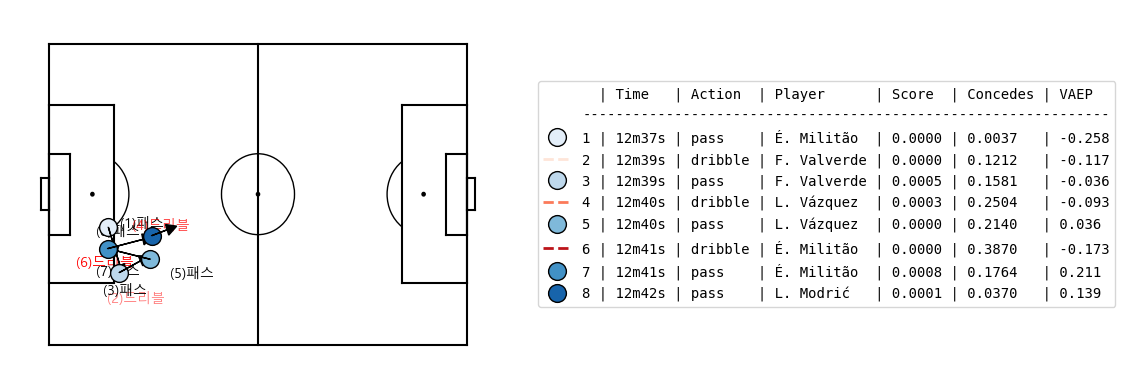

2021-04-10 21:00:00 Real Madrid 2-1 Barcelona 12' pass Éder Gabriel Militão
['Time', 'Action', 'Player', 'Score', 'Concedes', 'VAEP']
$e^{-t}$
  | Time   | Action  | Player      | Score  | Concedes | VAEP  


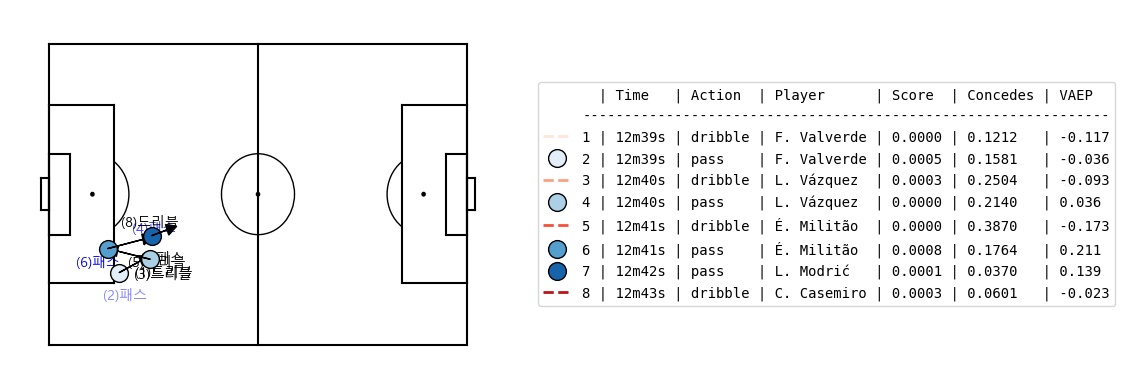

2021-04-10 21:00:00 Real Madrid 2-1 Barcelona 12' pass Luka Modrić
['Time', 'Action', 'Player', 'Score', 'Concedes', 'VAEP']
$e^{-t}$
  | Time   | Action  | Player      | Score  | Concedes | VAEP  


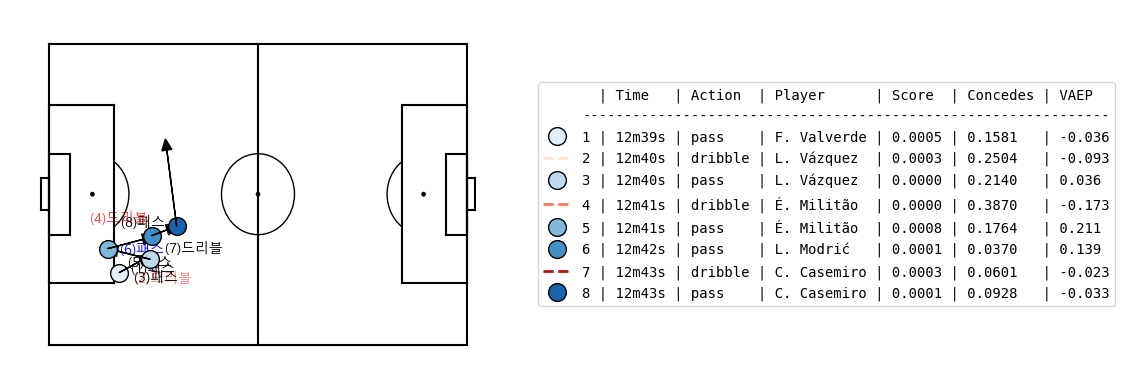

2021-04-10 21:00:00 Real Madrid 2-1 Barcelona 12' dribble Carlos Henrique Casimiro
['Time', 'Action', 'Player', 'Score', 'Concedes', 'VAEP']
$e^{-t}$
  | Time   | Action  | Player      | Score  | Concedes | VAEP  


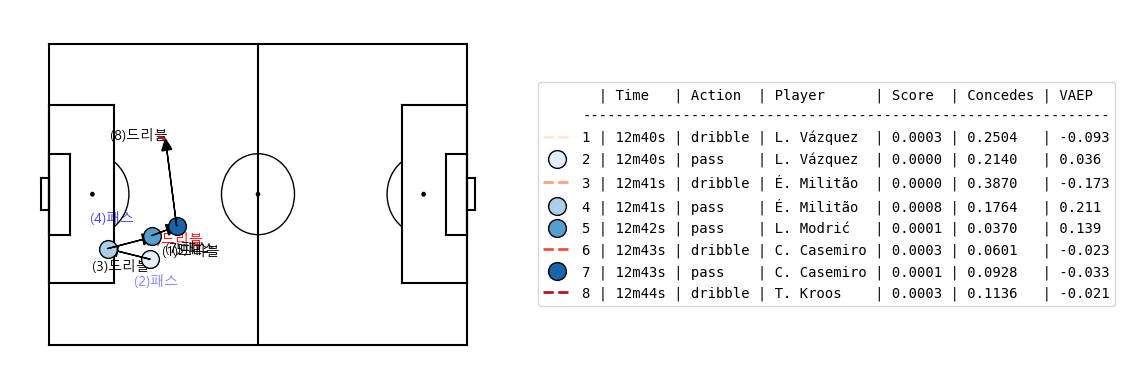

2021-04-10 21:00:00 Real Madrid 2-1 Barcelona 12' pass Carlos Henrique Casimiro
['Time', 'Action', 'Player', 'Score', 'Concedes', 'VAEP']
$e^{-t}$
  | Time   | Action  | Player      | Score  | Concedes | VAEP  


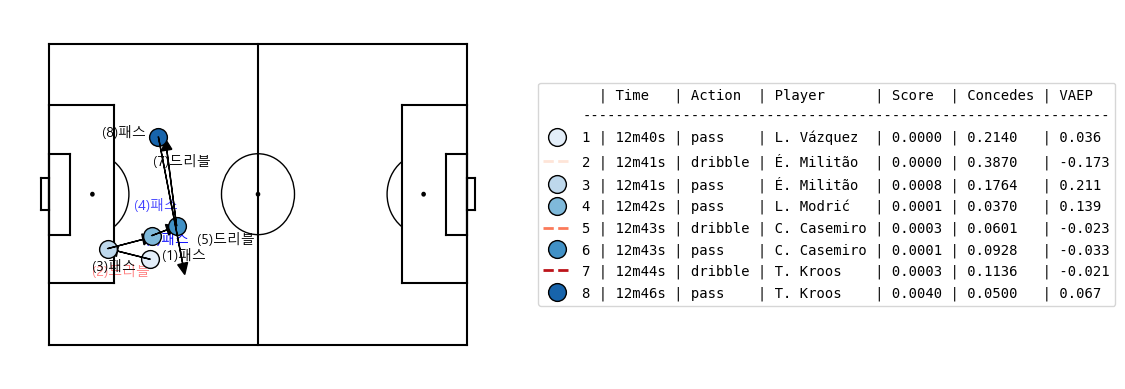

2021-04-10 21:00:00 Real Madrid 2-1 Barcelona 12' dribble Toni Kroos
['Time', 'Action', 'Player', 'Score', 'Concedes', 'VAEP']
$e^{-t}$
  | Time   | Action  | Player      | Score  | Concedes | VAEP  


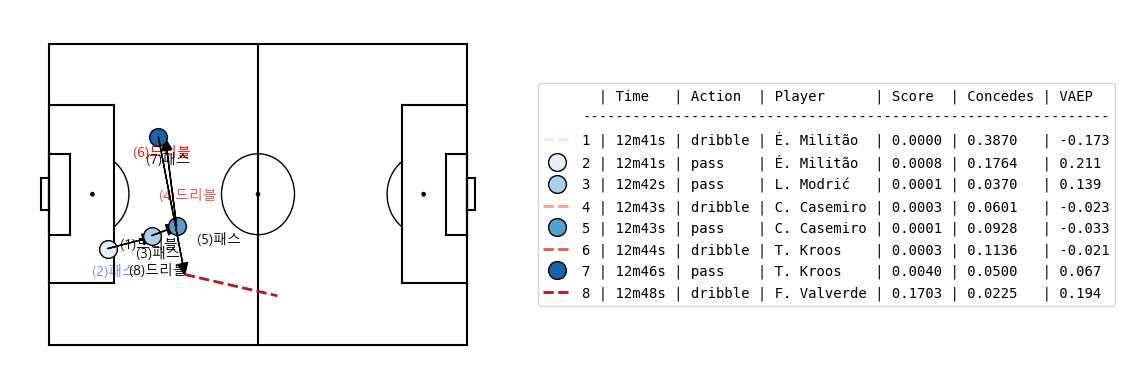

2021-04-10 21:00:00 Real Madrid 2-1 Barcelona 12' pass Toni Kroos
['Time', 'Action', 'Player', 'Score', 'Concedes', 'VAEP']
$e^{-t}$
  | Time   | Action  | Player      | Score  | Concedes | VAEP  


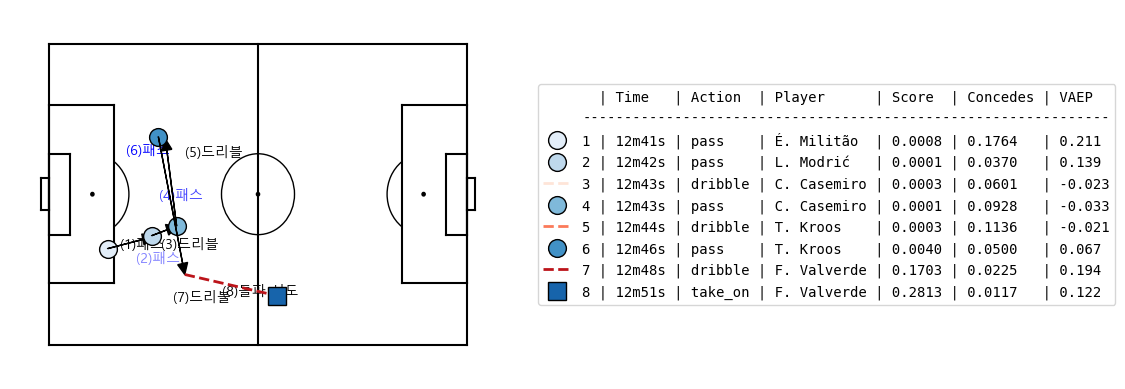

2021-04-10 21:00:00 Real Madrid 2-1 Barcelona 12' dribble Federico Santiago Valverde Dipetta
['Time', 'Action', 'Player', 'Score', 'Concedes', 'VAEP']
$e^{-t}$
  | Time   | Action  | Player      | Score  | Concedes | VAEP  


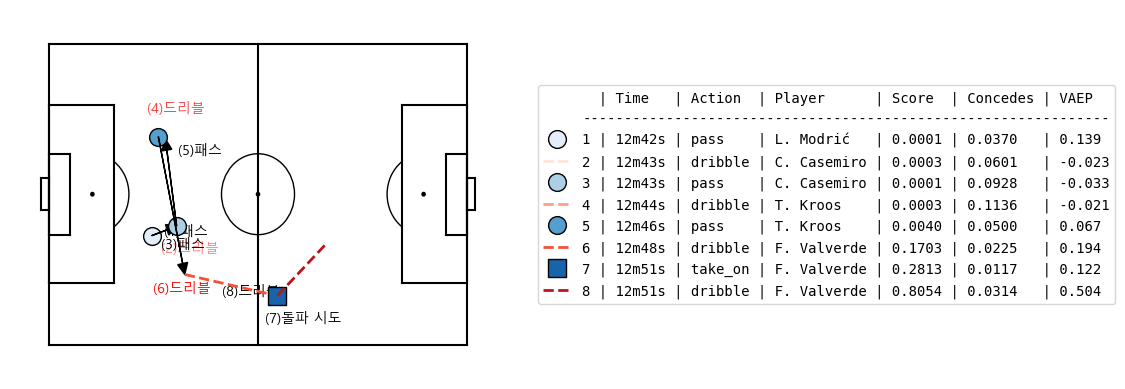

2021-04-10 21:00:00 Real Madrid 2-1 Barcelona 12' take_on Federico Santiago Valverde Dipetta
['Time', 'Action', 'Player', 'Score', 'Concedes', 'VAEP']
$e^{-t}$
  | Time   | Action  | Player      | Score  | Concedes | VAEP  


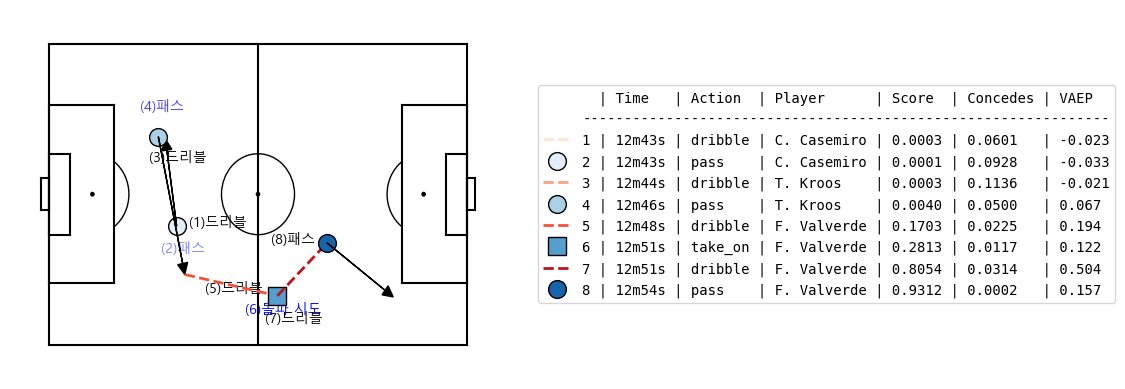

2021-04-10 21:00:00 Real Madrid 2-1 Barcelona 12' dribble Federico Santiago Valverde Dipetta
['Time', 'Action', 'Player', 'Score', 'Concedes', 'VAEP']
$e^{-t}$
  | Time   | Action  | Player      | Score  | Concedes | VAEP  


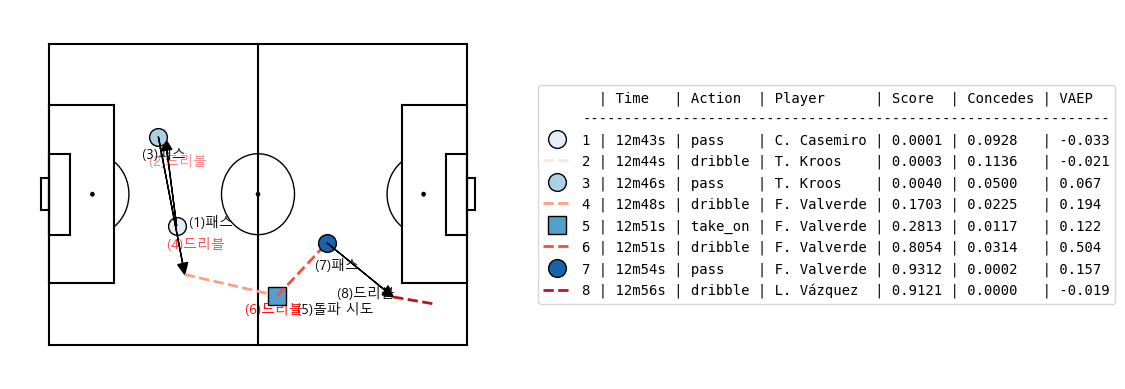

2021-04-10 21:00:00 Real Madrid 2-1 Barcelona 12' pass Federico Santiago Valverde Dipetta
['Time', 'Action', 'Player', 'Score', 'Concedes', 'VAEP']
$e^{-t}$
  | Time   | Action  | Player      | Score  | Concedes | VAEP  


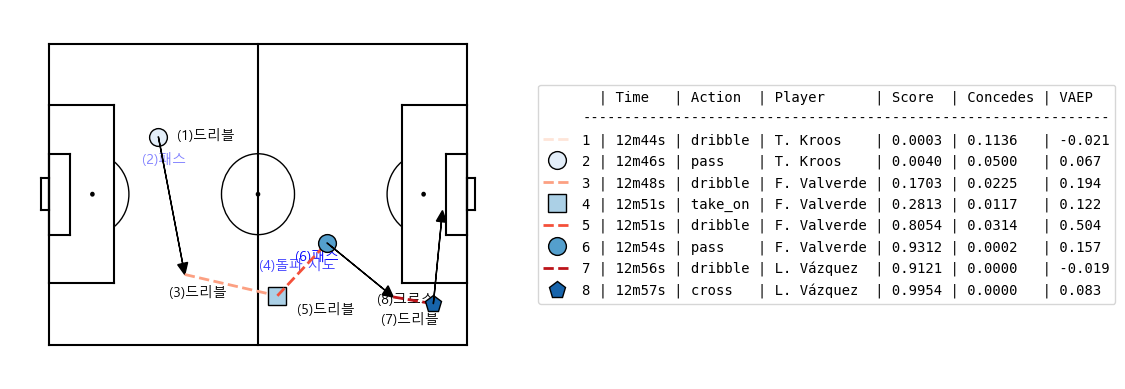

2021-04-10 21:00:00 Real Madrid 2-1 Barcelona 12' dribble Lucas Vázquez Iglesias
['Time', 'Action', 'Player', 'Score', 'Concedes', 'VAEP']
$e^{-t}$
  | Time   | Action  | Player      | Score  | Concedes | VAEP  


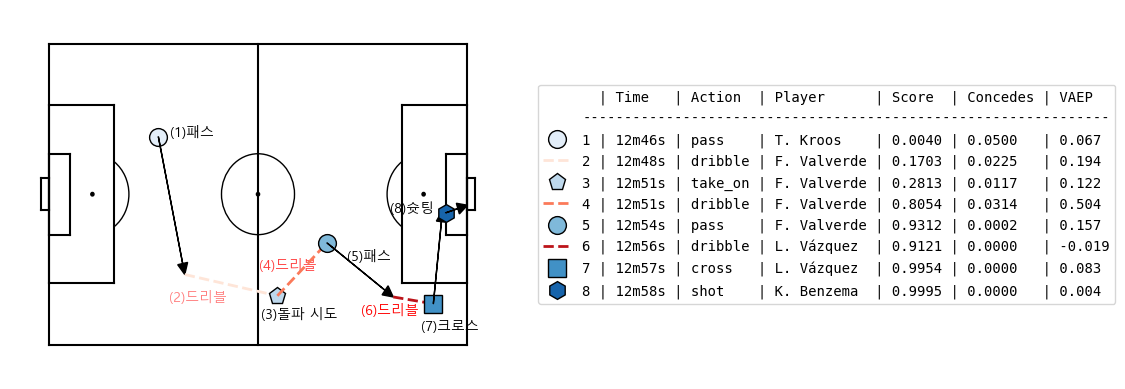

IndexError: list index out of range

In [23]:
import matplotsoccer
import matplotlib.pyplot as plt
sorted_A = A
# sorted_A = A.sort_values("vaep_value", ascending=False)
sorted_A = sorted_A[(sorted_A.time_seconds>760.0) & (sorted_A.time_seconds<780.0)]
sorted_A = sorted_A[sorted_A.game_id==3773497]
sorted_A = sorted_A[sorted_A.team_name == "Real Madrid"] # view only actions from Belgium
#sorted_A = sorted_A[~sorted_A.type_name.str.contains("shot")] #eliminate shots
#sorted_A = sorted_A[(sorted_A['scores']<0.7) & (sorted_A['concedes']<0.7)]
def get_time(period_id,time_seconds):
    m = int((period_id-1)*45 + time_seconds // 60)
    s = time_seconds % 60
    if s == int(s):
        s = int(s)
    return f"{m}m{s}s"

for j in range(0, 30):
    row = list(sorted_A[j:j+1].itertuples())[0]
    i = row.Index
    a = A[i - 5 : i+3].copy()
    
    
    result = False
    for vaep, team in zip(a['vaep_value'],a['team_name']):
        if (team !="Real Madrid"):
            result = True

    if result:
        continue
    
    a["player_name"] = a[["nickname", "player_name"]].apply(lambda x: x[0] if x[0] else x[1],axis=1)
    a['type_name'] = a['type_name'].replace("_"," ")
    
    for index, name in zip(a.index,a['player_name']):
        name_lst = name.split()
        first_name = name_lst[0][0] + ". "
        last_name = name_lst[-1]

        a.loc[index,'player_name'] = first_name + last_name
    
    g = list(games[games.game_id == a.game_id.values[0]].itertuples())[0]
    game_info = f"{g.game_date} {g.home_team_name} {g.home_score}-{g.away_score} {g.away_team_name}"
    minute = int((row.period_id-1)*45 + row.time_seconds // 60)
    print(f"{game_info} {minute}' {row.type_name} {row.player_name}")

    a["scores"] = a.scores.apply(lambda x : "%.4f" % x )
    a["concedes"] = a.concedes.apply(lambda x : "%.4f" % x )
    a["vaep_value"] = a.vaep_value.apply(lambda x : "%.3f" % x )
    a["time"] = a[["period_id","time_seconds"]].apply(lambda x: get_time(*x),axis=1)
    #cols = ["time", "type_name", "player_name", "team_name", "result_name","scores", "concedes","offensive_value","defensive_value","vaep_value"]
    cols = ["time", "type_name", "player_name","scores", "concedes","vaep_value"]
    col_name = ["Time", "Action", "Player","Score", "Concedes","VAEP"]
    t = "시간"
    matplotsoccer.actions(a[["start_x","start_y","end_x","end_y"]],
                a.type_name,
                team=a.team_name,
                result = a.result_name == "success",
                label=a[cols],
                labeltitle =  col_name,
                zoom=False)
    
    # for i,index in enumerate(a.index):
    #     text_name = f"({i+1}) {a.loc[index,'type_name']} \n {a.loc[index,'vaep_value']}"
    #     plt.text(a.loc[index,'start_x'],a.loc[index,'start_y'],text_name)